# Assessment submitted by Sahil Singh Chauhan

## Assessment Goal: Predict and analyze Churn

### This assessment is made for **Scriptguru Digital Solutions**.

### Part 1-Data Cleaning & Exploratory Data Analysis (EDA)


In [41]:
#IMPORTING LIBRARIES

# Core data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display 

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder



In [5]:
# LOAD DATASET

telco = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Make a working copy to avoid modifying the raw dataset
df = telco.copy() 

# Preview the first 10 rows
display(df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Cleaning 

In [6]:
# Preview dataset structure
print("Dataset Overview:")
df.info()  # 7043 rows 21 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

### The datatype of TotalCharges should have been a float value but it is given as object so we will first correct that.

In [8]:
# DATA CLEANING STEP 1: Fix Data Types
# Convert TotalCharges" column from object (string) to float
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

print(df['TotalCharges'].head())

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


In [10]:
# DATA CLEANING STEP 2: Check for Missing Values

def clean_and_report_missing(df):
    # Step 1: Identify missing values
    missing = df.isnull().sum()
    print("\n Missing Values Summary:")
    print(missing)

    # Step 2: Impute TotalCharges using MonthlyCharges × Tenure
    if 'TotalCharges' in df.columns and df['TotalCharges'].isnull().sum() > 0:
        missing_total = df['TotalCharges'].isnull()
        df.loc[missing_total, 'TotalCharges'] = (
            df.loc[missing_total, 'MonthlyCharges'] * df.loc[missing_total, 'tenure']
        )
        print(f"\n Imputed {missing_total.sum()} missing 'TotalCharges' using MonthlyCharges × Tenure.")

    return df
df = clean_and_report_missing(df)


 Missing Values Summary:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Now , Tenure is calculated in years,so tenure entries having value 0 will likely represent new customers with no billing history. For churn analysis and billing logic, it's best to exclude them from modeling. However, we will retain them for separate EDA to understand onboarding churn.
### It will be saved as df_tenure_zero

In [11]:
# DATA CLEANING STEP 3: Tenure Validation

def check_and_clean_tenure(df):
    zero_tenure_rows = df[df['tenure'] == 0].copy()
    count_zero_tenure = zero_tenure_rows.shape[0]
    percent_zero_tenure = (count_zero_tenure / len(df)) * 100

    if count_zero_tenure > 0:
        print(f"\n Found {count_zero_tenure} rows with 'tenure' = 0 ({percent_zero_tenure:.2f}%).")
        # Create separate DataFrame for tenure = 0
        global df_tenure_zero
        df_tenure_zero = zero_tenure_rows

        # Remove from main DataFrame
        df = df[df['tenure'] != 0]
        print(f" Removed {count_zero_tenure} rows from modeling dataset.")
    else:
        print("\n No rows with 'tenure' = 0 detected.")

    return df
df = check_and_clean_tenure(df)


 Found 11 rows with 'tenure' = 0 (0.16%).
 Removed 11 rows from modeling dataset.


## Distributions: Understanding the Data

Total Customers: 7032
Total Revenue (TotalCharges): $16,056,168.70
Average Monthly Charge: $64.80
Monthly Charge Range: $18.25 - $118.75
Tenure Range: 1 - 72 months



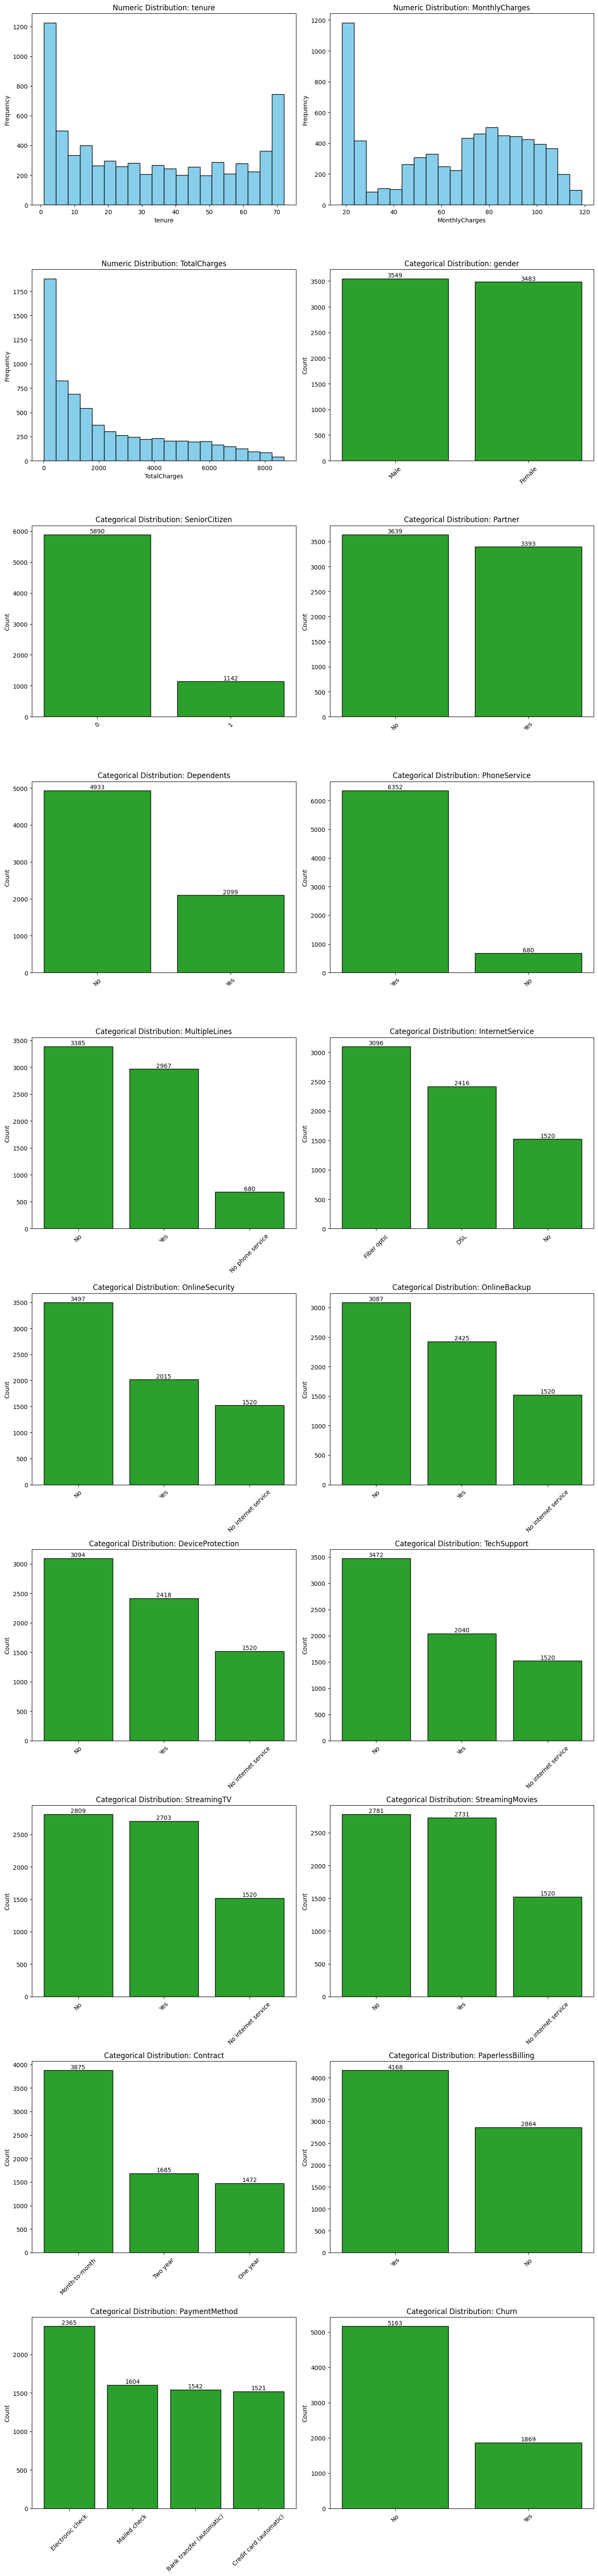

In [12]:
total_customers = df['customerID'].nunique()
total_revenue = df['TotalCharges'].sum()
avg_monthly_charge = df['MonthlyCharges'].mean()
min_monthly_charge = df['MonthlyCharges'].min()
max_monthly_charge = df['MonthlyCharges'].max()
min_tenure = df['tenure'].min()
max_tenure = df['tenure'].max()


print(f"Total Customers: {total_customers}")
print(f"Total Revenue (TotalCharges): ${total_revenue:,.2f}")
print(f"Average Monthly Charge: ${avg_monthly_charge:.2f}")
print(f"Monthly Charge Range: ${min_monthly_charge:.2f} - ${max_monthly_charge:.2f}")
print(f"Tenure Range: {min_tenure} - {max_tenure} months")
print()

# # DISTRIBUTIONS: Understanding the Data at a Glance
# # Explore numeric and categorical distributions to spot patterns

# --- COLUMN GROUPING ---
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# --- PLOTTING DISTRIBUTIONS ---
total_plots = len(numeric_cols) + len(categorical_cols)
cols = 2
rows = (total_plots + 1) // cols

plt.figure(figsize=(14, 6*rows))

# Numeric distributions (histograms)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Numeric Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Categorical distributions (bar charts)
for j, col in enumerate(categorical_cols, len(numeric_cols)+1):
    plt.subplot(rows, cols, j)
    counts = df[col].value_counts()
    bars = plt.bar(counts.index.astype(str), counts.values, color='#2ca02c', edgecolor='black')
    plt.title(f'Categorical Distribution: {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## EDA Churn Breakdown

This section explores churn patterns across two distinct segments:
- **Ongoing Customers** (tenure > 0): Customers with service history, used for modeling
- **New Customers** (tenure = 0): Recently signed up, excluded from modeling but analyzed separately to understand onboarding churn

### Top 10 Churn-Contributing Categories ###


,Feature,Category,ChurnCount,TotalChurn,ShareOfTotalChurn (%)
0,PhoneService,Yes,1699,1869,90.90
1,Contract,Month-to-month,1655,1869,88.55
2,Dependents,No,1543,1869,82.56
3,OnlineSecurity,No,1461,1869,78.17
4,TechSupport,No,1446,1869,77.37
5,PaperlessBilling,Yes,1400,1869,74.91
6,SeniorCitizen,0,1393,1869,74.53
7,InternetService,Fiber optic,1297,1869,69.40
8,OnlineBackup,No,1233,1869,65.97
9,DeviceProtection,No,1211,1869,64.79


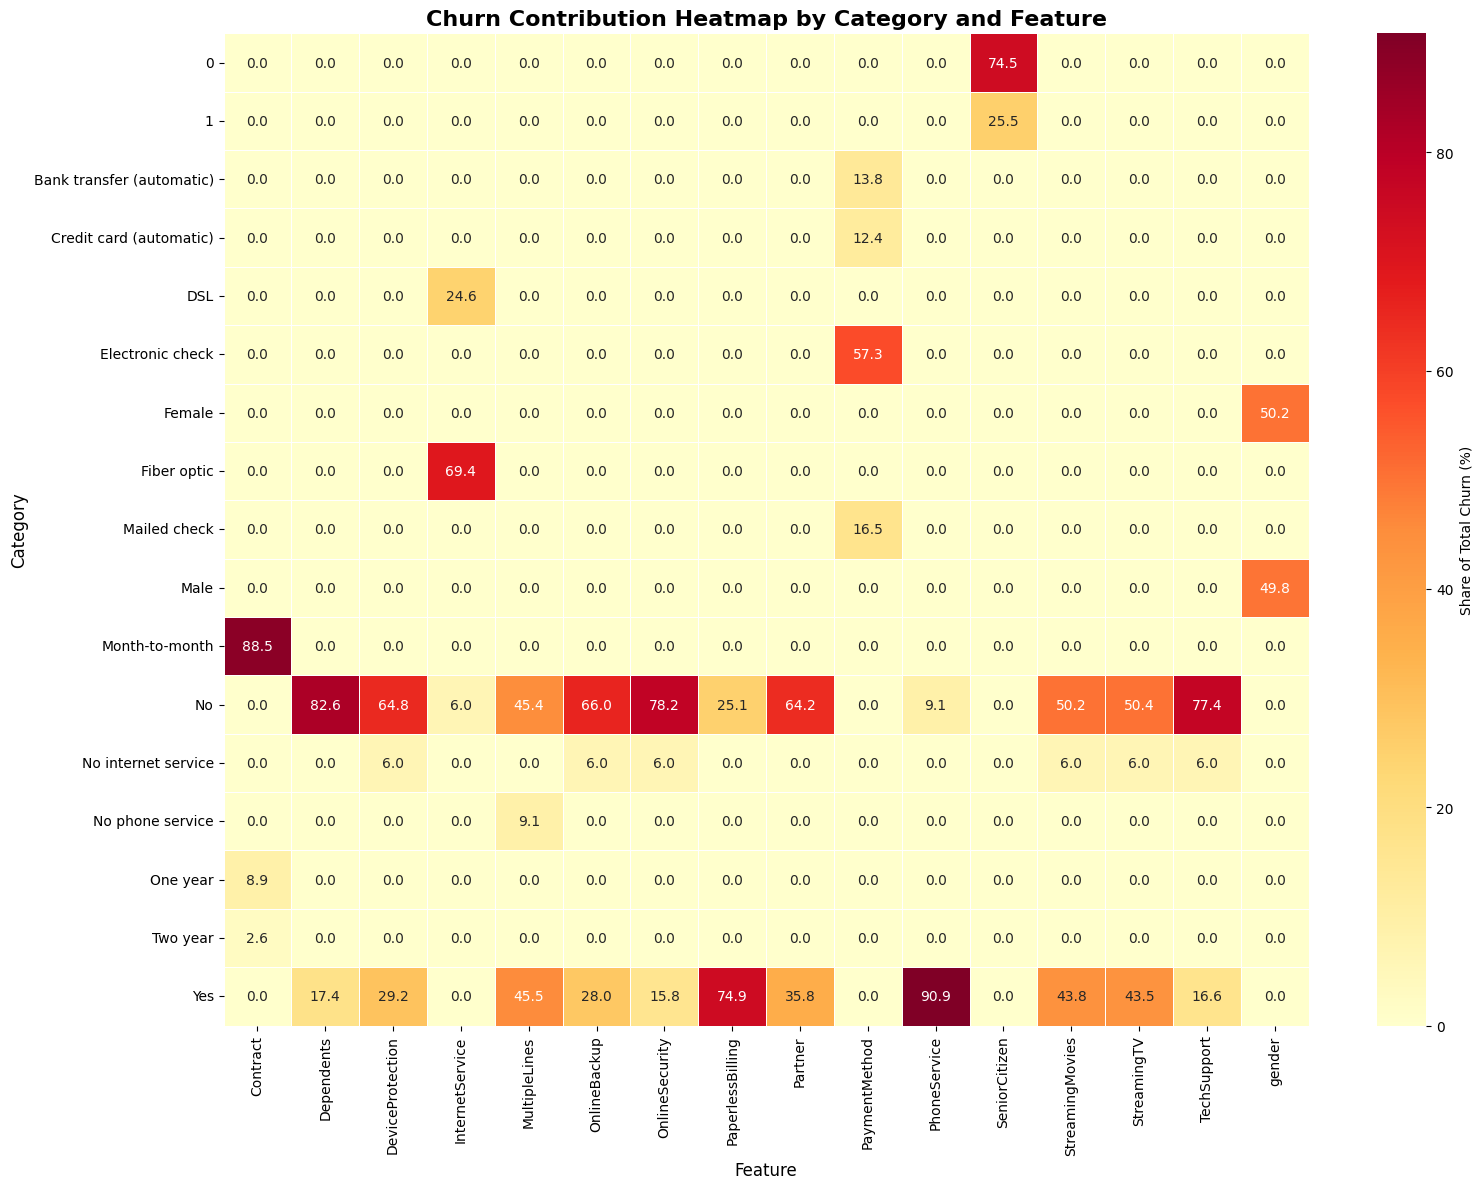

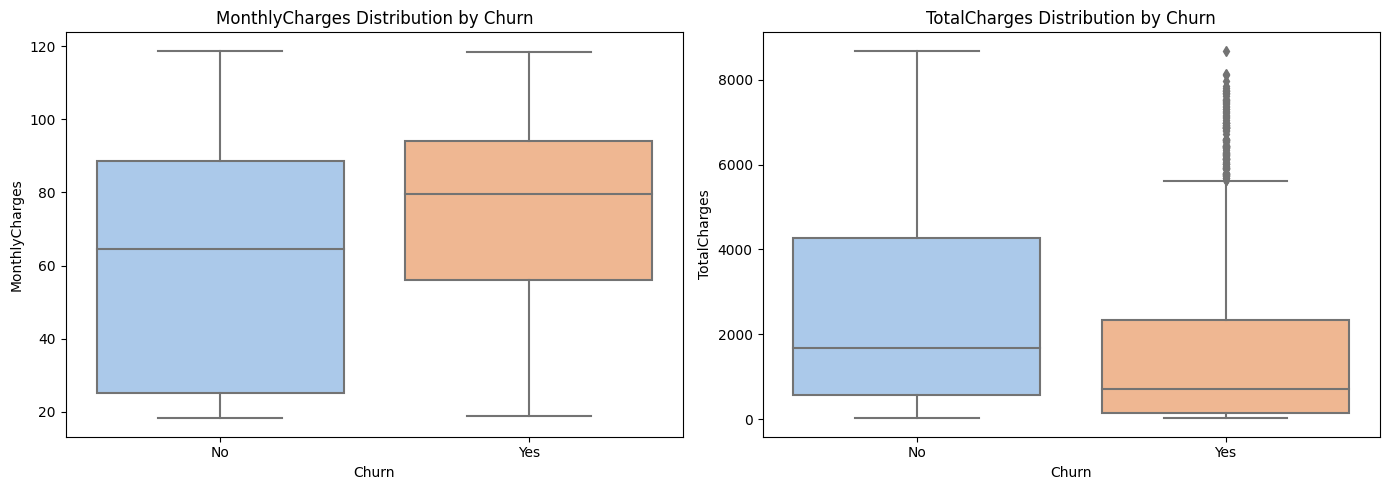


=== Churn Breakdown for gender ===


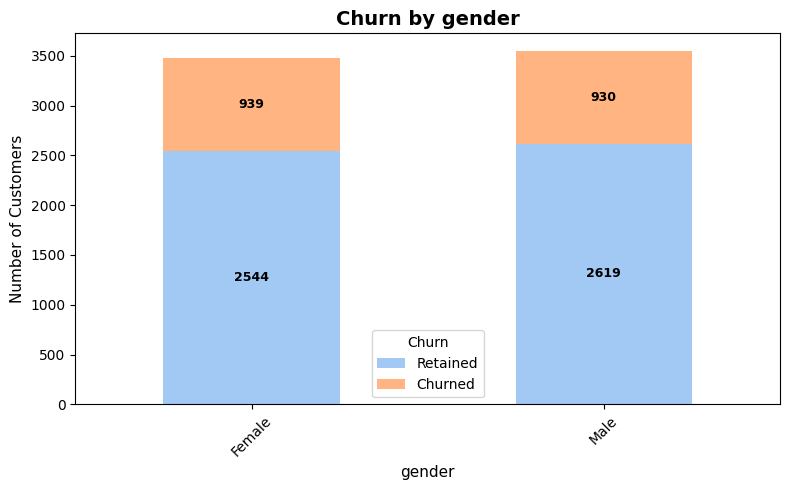


Churn Analysis for: gender


Churn,Yes,No,Total,ChurnCount,TotalChurn,ChurnRate (%),ShareOfTotalChurn (%)
gender,,,,,,,
Female,939,2544,3483,939,1869,26.96,50.24
Male,930,2619,3549,930,1869,26.20,49.76



=== Churn Breakdown for SeniorCitizen ===


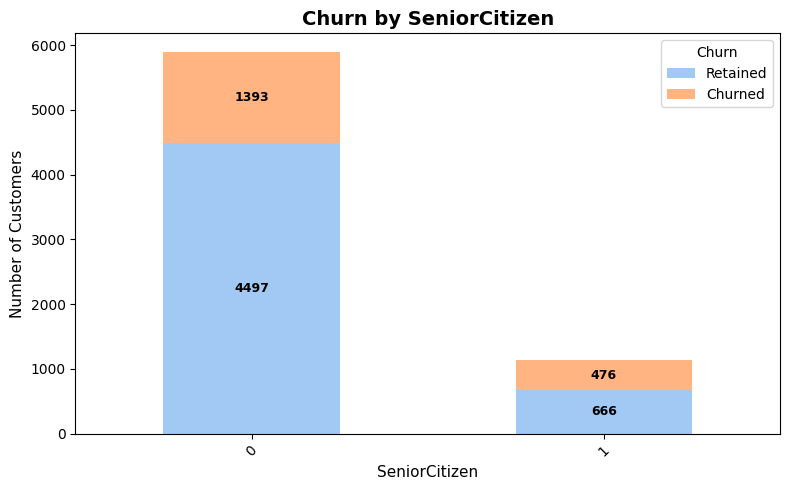


Churn Analysis for: SeniorCitizen


Churn,Yes,No,Total,ChurnCount,TotalChurn,ChurnRate (%),ShareOfTotalChurn (%)
SeniorCitizen,,,,,,,
0,1393,4497,5890,1393,1869,23.65,74.53
1,476,666,1142,476,1869,41.68,25.47



=== Churn Breakdown for Partner ===


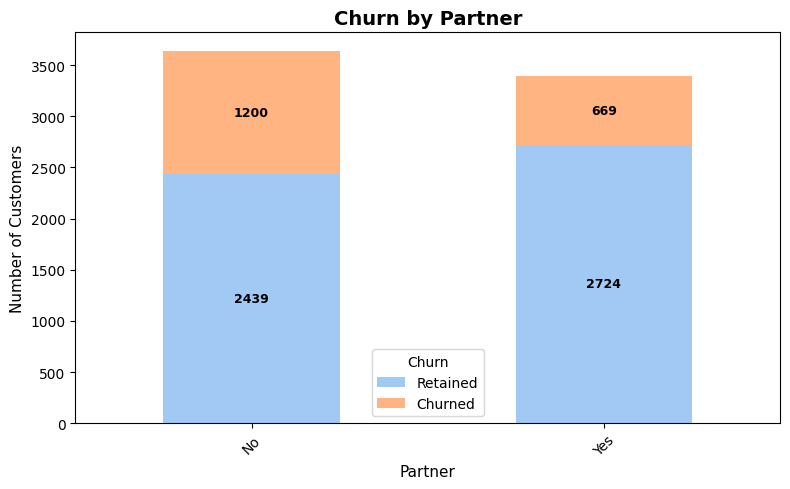


Churn Analysis for: Partner


Churn,Yes,No,Total,ChurnCount,TotalChurn,ChurnRate (%),ShareOfTotalChurn (%)
Partner,,,,,,,
No,1200,2439,3639,1200,1869,32.98,64.21
Yes,669,2724,3393,669,1869,19.72,35.79


In [13]:
# EDA Churn Breakdown

# Step 1: Define categorical columns for churn breakdown 
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
# Step 2: Compute contribution to total churn across all categorical columns
def churn_contribution_summary(df, columns):
    churn_contributions = []
    total_churn = df[df['Churn'] == 'Yes'].shape[0]

    for col in columns:
        churn_counts = df[df['Churn'] == 'Yes'][col].value_counts()
        churn_percent = round((churn_counts / total_churn) * 100, 2)
        temp_df = churn_percent.reset_index()
        temp_df.columns = ['Category', 'ShareOfTotalChurn (%)']
        temp_df['Feature'] = col
        temp_df['ChurnCount'] = churn_counts.values
        temp_df['TotalChurn'] = total_churn
        churn_contributions.append(temp_df)

    return pd.concat(churn_contributions, ignore_index=True)

# Run contribution summary
contribution_df = churn_contribution_summary(df, categorical_columns)

# Step 3: Top 10 churn-heavy categories (table only)
top_contributors = contribution_df.sort_values(by='ShareOfTotalChurn (%)', ascending=False).head(10)

# Display heading and caption
print("### Top 10 Churn-Contributing Categories ###")

# Display table without index
display(top_contributors[['Feature', 'Category', 'ChurnCount', 'TotalChurn', 'ShareOfTotalChurn (%)']].reset_index(drop=True))

# Step 4: Full churn contribution heatmap
pivot_df = contribution_df.pivot(index='Category', columns='Feature', values='ShareOfTotalChurn (%)').fillna(0)

plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Share of Total Churn (%)'})
plt.title('Churn Contribution Heatmap by Category and Feature', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# Step 5: Boxplots for MonthlyCharges and TotalCharges vs. Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('MonthlyCharges Distribution by Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('MonthlyCharges')

sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='pastel', ax=axes[1])
axes[1].set_title('TotalCharges Distribution by Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('TotalCharges')

plt.tight_layout()
plt.show()

# Step 6: Stacked bar and churn rate table per column
def churn_rate_table_and_plot(df, column):
    churn_data = df.groupby([column, 'Churn']).size().unstack(fill_value=0)
    churn_data['Total'] = churn_data.sum(axis=1)
    churn_data['ChurnRate (%)'] = round((churn_data['Yes'] / churn_data['Total']) * 100, 2)

    # Add contribution to total churn
    total_churn = df[df['Churn'] == 'Yes'].shape[0]
    churn_data['ShareOfTotalChurn (%)'] = round((churn_data['Yes'] / total_churn) * 100, 2)
    churn_data['ChurnCount'] = churn_data['Yes']
    churn_data['TotalChurn'] = total_churn

    churn_data_sorted = churn_data.sort_values(by='ShareOfTotalChurn (%)', ascending=False)

    # Stacked bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    churn_data_plot = churn_data[['No', 'Yes']]
    churn_data_plot.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('pastel'))
    ax.set_title(f'Churn by {column}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Customers', fontsize=11)
    ax.set_xlabel(column, fontsize=11)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Churn', labels=['Retained', 'Churned'])

    # Add count labels
    for idx, val in enumerate(churn_data_plot.index):
        y_offset = 0
        for churn_val in churn_data_plot.columns:
            count = churn_data_plot.loc[val, churn_val]
            if count > 0:
                ax.text(idx, y_offset + count / 2, int(count), ha='center', va='center', fontsize=9, fontweight='bold')
                y_offset += count

    plt.tight_layout()
    plt.show()

    # Display churn rate + contribution table
    print(f"\nChurn Analysis for: {column}")
    display(churn_data_sorted[['Yes', 'No', 'Total', 'ChurnCount', 'TotalChurn', 'ChurnRate (%)', 'ShareOfTotalChurn (%)']])

# Step 7: Run churn breakdown for all categorical columns
i=0
for col in categorical_columns:
    if i==3:
        break
    i=i+1
    print(f"\n{'='*70}")
    print(f"=== Churn Breakdown for {col} ===")
    print(f"{'='*70}")
    churn_rate_table_and_plot(df, col)

In [14]:
# EDA Churn Breakdown New Customers

# Churn Count Summary for New Customers
total_new_customers = df_tenure_zero.shape[0]
churned_new_customers = df_tenure_zero[df_tenure_zero['Churn'] == 'Yes'].shape[0]
churn_rate_new_customers = round((churned_new_customers / total_new_customers) * 100, 2)

print(f" Total New Customers (tenure = 0): {total_new_customers}")
print(f" Churned New Customers: {churned_new_customers}")
print(f" Churn Rate (New Customers): {churn_rate_new_customers}%")

 Total New Customers (tenure = 0): 11
 Churned New Customers: 0
 Churn Rate (New Customers): 0.0%


## Encoding

In [16]:
# Step 1: Define encoding function
def encode_churn_data(df):
    df_encoded = df.copy()
    le = LabelEncoder()
    
    # Encode all object (categorical) columns using LabelEncoder
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    
    return df_encoded

# Step 2: Create and encode model-specific dataframes
df_model_logreg = encode_churn_data(df)  # For Logistic Regression
df_model_rf = encode_churn_data(df)      # For Random Forest
df_model_xgb = encode_churn_data(df)     # For XGBoost


## Correlation Analysis

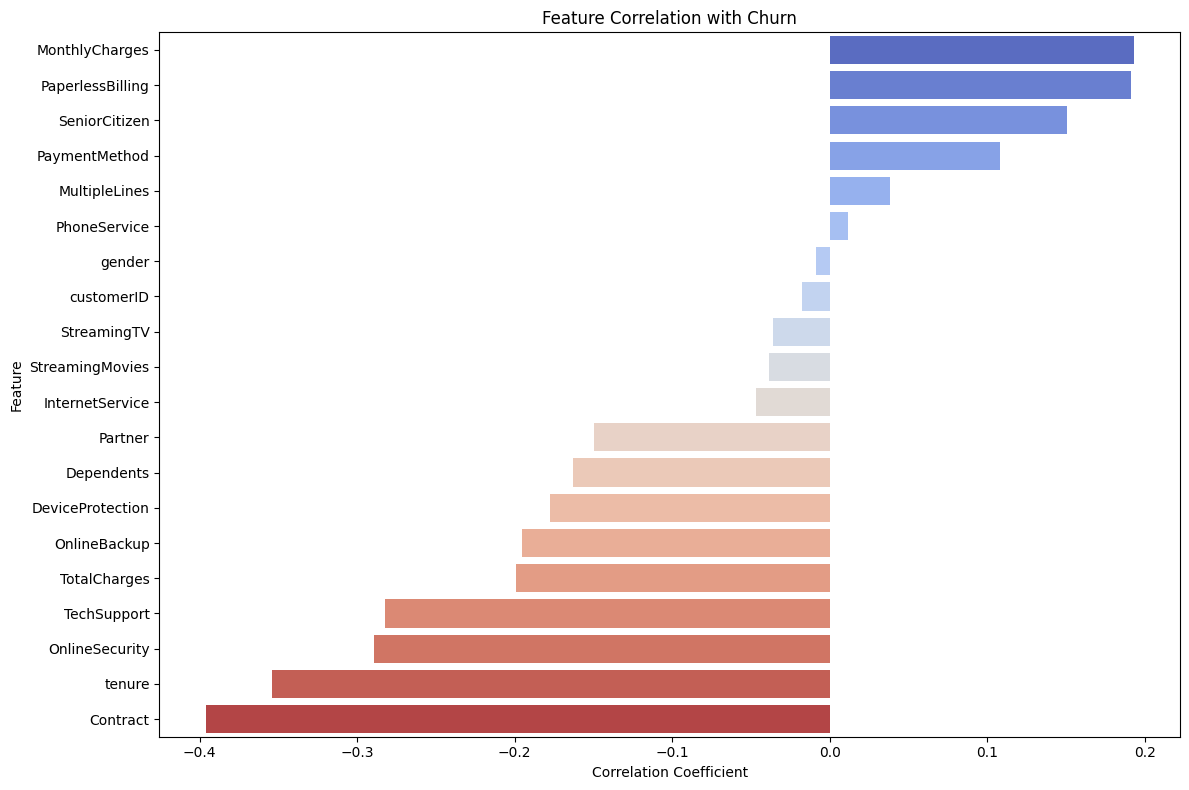

Top 10 Features Most Correlated with Churn


,Feature,CorrelationWithChurn,Interpretation
0,MonthlyCharges,0.192858,Weak or no correlation
1,PaperlessBilling,0.191454,Weak or no correlation
2,SeniorCitizen,0.150541,Weak or no correlation
3,PaymentMethod,0.107852,Weak or no correlation
4,MultipleLines,0.038043,Weak or no correlation
5,PhoneService,0.011691,Weak or no correlation
6,gender,-0.008545,Weak or no correlation
7,customerID,-0.017858,Weak or no correlation
8,StreamingTV,-0.036303,Weak or no correlation
9,StreamingMovies,-0.038802,Weak or no correlation


In [17]:
# CORRELATION ANALYSIS: Correlation to churn
# Explore relationships between all encoded features and churn

# Step 1: Select all numeric columns (includes encoded + original numeric)
numeric_cols = df_model_logreg.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Create correlation matrix
correlation_matrix = df_model_logreg[numeric_cols].corr()

# Step 3: Extract correlation with churn
correlation_with_churn = correlation_matrix['Churn'].drop('Churn').sort_values(ascending=False)

# Step 4: Visualize Correlation with Churn
plt.figure(figsize=(12, 8))
sns.barplot(
    x=correlation_with_churn.values,
    y=correlation_with_churn.index,
    palette='coolwarm'
)
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Step 5: Create summary table
summary_df = correlation_with_churn.reset_index()
summary_df.columns = ['Feature', 'CorrelationWithChurn']

# Step 6: Add interpretation column
def interpret(row):
    if row['CorrelationWithChurn'] > 0.2:
        return 'Positively correlated with churn'
    elif row['CorrelationWithChurn'] < -0.2:
        return 'Negatively correlated with churn'
    else:
        return 'Weak or no correlation'

summary_df['Interpretation'] = summary_df.apply(interpret, axis=1)

# Step 7: Display top 10 insights
print("Top 10 Features Most Correlated with Churn")
display(summary_df.head(10))


## Key Insights from EDA

1. **Revenue & Customer Base**  
   - 7,032 customers, 16.06 M total revenue, avg. monthly charge $64.80, tenure 1–72 months.  
   - Mid-to-high charges and medium-tenure customers drive most revenue → retention focus here.

2. **Top Churn Signals**  
   - MonthlyCharges (0.19), PaperlessBilling (0.19), SeniorCitizen (0.15).  
   - Churn is multi-factorial; no single feature dominates.

3. **Segment Patterns**  
   - Month-to-month contracts, electronic check users, and no support services have higher churn.  
   - Younger customers contribute majority of churn volume despite slightly lower individual risk.


## Part 2-Model Building & Evaluation

To predict churn and uncover its drivers, we’ll train and compare three models:

- **Logistic Regression** – baseline and interpretability  
- **Random Forest** – handles feature interactions robustly

We’ll benchmark them using **AUC, F1-score, precision, and recall**, then use **feature importance** to explain what drives churn.

## Logistic Regression

A simple yet powerful classification model that estimates the probability of churn, predicting whether a customer will leave (`1`) or stay (`0`). Ideal for baseline performance and interpreting key churn drivers.

 Classification Report (Model V1):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.57      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

 ROC AUC Score (Model V1): 0.833231955107133


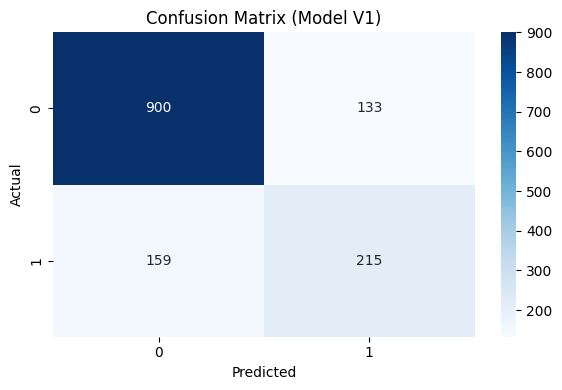

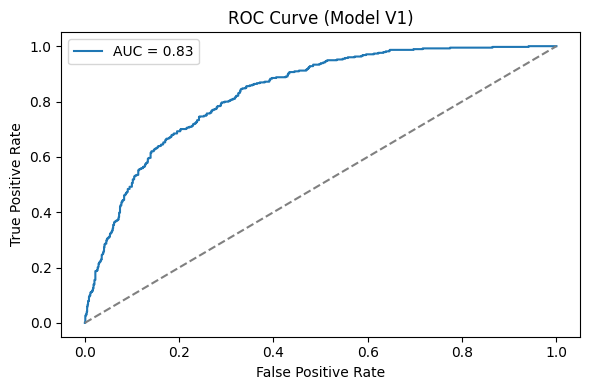

Feature Drivers (Model V1):


,Feature,Coefficient,Abs_Coefficient
14,Contract,-0.881547,0.881547
5,PhoneService,-0.578742,0.578742
15,PaperlessBilling,0.349408,0.349408
3,Dependents,-0.313113,0.313113
8,OnlineSecurity,-0.294423,0.294423
1,SeniorCitizen,0.288597,0.288597
11,TechSupport,-0.272155,0.272155
9,OnlineBackup,-0.150172,0.150172
6,MultipleLines,0.118614,0.118614
0,gender,-0.094236,0.094236


In [30]:
# LOGISTIC REGRESSION Model V1: Churn Prediction Baseline

# Step 0: Drop only identifier columns

drop_cols = ['customerID']
X = df_model_logreg.drop(columns=drop_cols + ['Churn'])
y = df_model_logreg['Churn']

# Step 1: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Initialize and train model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 3: Predict and evaluate

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]


X_full = df_model_logreg.drop(columns=drop_cols + ['Churn'])
y_proba_full = logreg.predict_proba(X_full)[:, 1]
y_pred_full = logreg.predict(X_full)

df_model_logreg['churn_probability'] = y_proba_full
df_model_logreg['churn_prediction'] = y_pred_full
df_model_logreg['prediction_timestamp'] = pd.Timestamp.now()


print(" Classification Report (Model V1):")
print(classification_report(y_test, y_pred))
print(" ROC AUC Score (Model V1):", roc_auc_score(y_test, y_proba))

# Step 4: Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Model V1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 5: ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Model V1)")
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Feature Importance

feature_names = X.columns
coefficients = logreg.coef_[0]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Drivers (Model V1):")
display(importance_df.head(10))

## Random Forest

A model that combines many decision trees to make better predictions. It’s great at spotting patterns and handling complex data without overfitting.

 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

 ROC AUC Score: 0.812919641146963


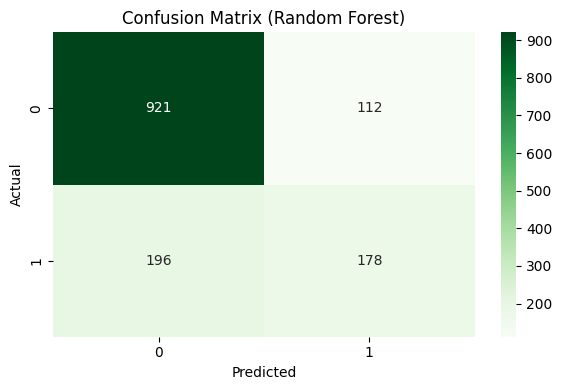

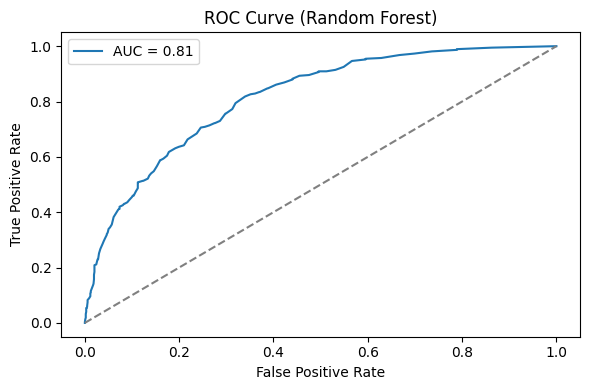

Top Feature Drivers (Random Forest):


,Feature,Importance
18,TotalCharges,0.168290
17,MonthlyCharges,0.163161
4,tenure,0.149012
14,Contract,0.116285
8,OnlineSecurity,0.055238
11,TechSupport,0.053644
16,PaymentMethod,0.049820
9,OnlineBackup,0.028098
7,InternetService,0.027918
0,gender,0.026306


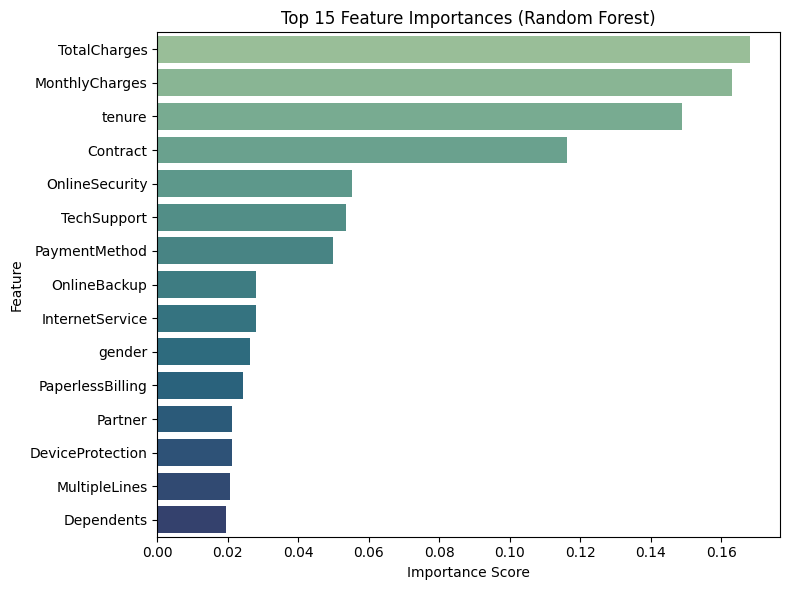

In [31]:
# RANDOM FOREST Model: Churn Prediction
# Step 0: Drop identifier columns only

drop_cols = ['customerID']
X = df_model_rf.drop(columns=drop_cols + ['Churn'])
y = df_model_rf['Churn']

# Step 1: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Initialize and train Random Forest

rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

# Step 3: Predict on full data for final output

y_proba_full = rf_model.predict_proba(X)[:, 1]
y_pred_full = rf_model.predict(X)

df_model_rf['churn_prediction_rf'] = y_pred_full
df_model_rf['churn_probability_rf'] = y_proba_full
df_model_rf['prediction_timestamp_rf'] = pd.Timestamp.now()

# Step 4: Evaluate on test set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print(" Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 5: Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 6: ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Feature Importance

rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Feature Drivers (Random Forest):")
display(rf_importance_df.head(15))

plt.figure(figsize=(8, 6))
sns.barplot(data=rf_importance_df.head(15), x='Importance', y='Feature', palette='crest')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Hypertuned Logistic Rgression model

****
We introduced **Logistic Regression V2 (Hyperparameter Tuned)** to improve the baseline Logistic Regression. 
The model tuning included **regularization choice (L1/L2), solver selection, and class weights** 
to better handle class imbalance and improve convergence.
****

# Key Improvements in V2

****
- **Class Weights**: Balanced weights to improve detection of churned customers.
- **Regularization (L1/L2)**: Controlled overfitting while maintaining interpretability.
- **Max Iterations Increased**: Ensured proper convergence and stability of coefficients.
****




Best Parameters: {'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC: 0.8454383862268902
Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

 ROC AUC Score: 0.8347


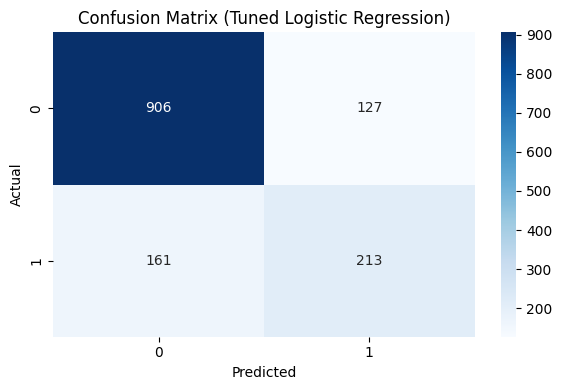

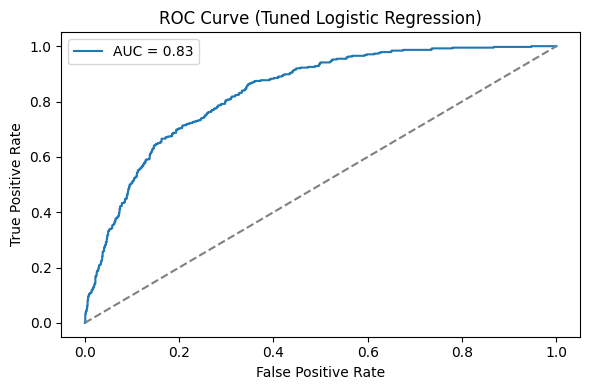

 Top 10 Feature Drivers (Tuned Logistic Regression):


,Feature,Coefficient,Abs_Coefficient
5,PhoneService,-1.010565,1.010565
14,Contract,-0.751884,0.751884
15,PaperlessBilling,0.309297,0.309297
8,OnlineSecurity,-0.292368,0.292368
11,TechSupport,-0.273045,0.273045
3,Dependents,-0.240358,0.240358
7,InternetService,0.219665,0.219665
1,SeniorCitizen,0.210065,0.210065
9,OnlineBackup,-0.157296,0.157296
6,MultipleLines,0.098081,0.098081


In [34]:
#Step 0: Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

#Step 1: Initialize Logistic Regression
logreg = LogisticRegression(max_iter=5000)

# Grid Search
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)

#Step 2: Retrain model with best params on full training data
best_logreg = grid.best_estimator_
best_logreg.fit(X_train, y_train)

#Step 3: Predictions
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]

# Step 4: Store predictions in a DataFrame ---
df_results = pd.DataFrame(X_test.copy())
df_results['churn_prediction'] = y_pred
df_results['churn_probability'] = y_proba
df_results['prediction_timestamp'] = pd.Timestamp.now()
df_results['model_version'] = 'logreg_tuned_v1'


# Step 5: Classification Report & ROC AUC

print("Classification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(" ROC AUC Score:", round(roc_auc, 4))

# Step 6: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Tuned Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Tuned Logistic Regression)")
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Feature Importance (Coefficients)
feature_names = X_train.columns
coefficients = best_logreg.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

print(" Top 10 Feature Drivers (Tuned Logistic Regression):")
display(importance_df.head(10))

## Comparision

In [42]:
# MODEL COMPARISON: Tuned Logistic Regression vs Random Forest
# Define models and their predictions
models = {
    "Tuned Logistic Regression": {
        "y_true": y_test,
        "y_pred": best_logreg.predict(X_test),
        "y_proba": best_logreg.predict_proba(X_test)[:, 1]
    },
    "Random Forest": {
        "y_true": y_test,
        "y_pred": rf_model.predict(X_test),
        "y_proba": rf_model.predict_proba(X_test)[:, 1]
    }
}

# Collect metrics
comparison_list = []
for name, data in models.items():
    comparison_list.append({
        "Model": name,
        "Accuracy": accuracy_score(data["y_true"], data["y_pred"]),
        "Precision": precision_score(data["y_true"], data["y_pred"]),
        "Recall": recall_score(data["y_true"], data["y_pred"]),
        "F1 Score": f1_score(data["y_true"], data["y_pred"]),
        "ROC AUC": roc_auc_score(data["y_true"], data["y_proba"])
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_list)
comparison_df = comparison_df.set_index("Model").round(3)

print("Model Performance Comparison:")
display(comparison_df)


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Tuned Logistic Regression,0.795,0.626,0.570,0.597,0.835
Random Forest,0.781,0.614,0.476,0.536,0.813


# Model Selection Summary

****
We initially implemented **Logistic Regression V1** for its simplicity, interpretability, and strong baseline performance. 
Random Forest was also evaluated as a more complex model, but it did not significantly outperform Logistic Regression on this dataset.  
To improve churn detection, we introduced **Logistic Regression V2 (Hyperparameter Tuned)** with optimized regularization, solver, and class weights.


---

# Why Logistic Regression Was Selected


- Easy to interpret feature coefficients → Identifies key churn drivers.  
- Baseline AUC and balanced precision-recall performance.  
- Handles small-to-medium feature sets efficiently without extensive tuning.  
- Hyperparameter tuning in V2 improved handling of class imbalance and model convergence.

---

# Model Comparison

| Model                       | AUC    | Precision (Churn) | Recall (Churn) | F1-score (Churn) |
|------------------------------|--------|-----------------|----------------|-----------------|
| Logistic Regression V1       | 0.82   | Moderate        | Moderate       | Moderate        |
| Logistic Regression V2 (Tuned)| 0.83   | Moderate        | Higher       | Moderate        |
| Random Forest                | 0.81   |  Higher       | Moderate       | Moderate        |

****

# Metrics Used

****
- **AUC (Area Under Curve)** → Measures how well the model separates churners from non-churners. Higher = better ranking ability.  
- **Precision** → Of all customers predicted to churn, how many actually did?  
- **Recall** → Of all customers who actually churned, how many did the model catch?  
- **F1-score** → Harmonic mean of precision and recall; useful when both matter.  

---

# Why Recall Matters More

****
In churn prevention, **missing actual churners (low recall)** results in lost revenue.  
We prioritize **catching more potential churners** (even with some false positives) over missing customers who may leave silently.  

